In [1]:
# Import libraries need for  Modelling
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading CSV file and converting into dataframe
dt=pd.read_csv('database_IND.csv')

In [3]:
pd.set_option("display.max_columns", 100)

In [4]:
# Dataset available for analysis
dt

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     other_fuel3  commissioning_year                                owner  \
0            NaN              2011.0                          Solar Paces   
1            NaN                 NaN                 Ultratech Cement ltd   
2            NaN                 NaN                                  AES   
3            NaN              2004.0                                  NaN   
4            NaN              2015.0                                  NaN   
..           ...                 ...                                  ...   
902          NaN              2016.0                                  NaN   
903          NaN                 NaN  Karnataka Power Corporation Limited   
904          NaN                 NaN                                  NaN   
905          NaN                 NaN                   Hindustan Zinc ltd   
906          NaN                 NaN                   iEnergy Wind Farms   

                                   source  \
0    National Renewable Energy Laboratory   
1                    Ultratech Cement ltd   
2                                     CDM   
3           Central Electricity Authority   
4           Central Electricity Authority   
..                                    ...   
902         Central Electricity Authority   
903   Karnataka Power Corporation Limited   
904                                   CDM   
905                    Hindustan Zinc ltd   
906                                   CDM   

                                                   url  \
0    http://www.nrel.gov/csp/solarpaces/project_det...   
1                      http://www.ultratechcement.com/   
2    https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...   
3                               http://www.cea.nic.in/   
4                               http://www.cea.nic.in/   
..                                                 ...   
902                             http://www.cea.nic.in/   
903                          http://karnatakapower.com   
904  https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...   
905                           http://www.hzlindia.com/   
906  https://cdm.unfccc.int/Projects/DB/RWTUV134503...   

                       geolocation_source  wepp_id  year_of_cap

In [5]:
print('The shape of the dataset is', dt.shape)

The shape of the dataset is (907, 27)


In [6]:
# Dataframe columns
dt.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [7]:
# To find the data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column country has ['IND'] unique elements
****************************************************************************************************
This column country_long has ['India'] unique elements
****************************************************************************************************
This column name has ['ACME Solar Tower' 'ADITYA CEMENT WORKS' 'AES Saurashtra Windfarms'
 'AGARTALA GT' 'AKALTARA TPP' 'AKRIMOTA LIG' 'ALIYAR' 'ALLAIN DUHANGAN'
 'ALMATTI DAM' 'AMAR KANTAK' 'AMARAVATI TPP' 'ANANDPUR SAHIB ST-I&II'
 'ANAPARA "C"' 'ANDHRA' 'ANOOPGARH ST I&II' 'ANPARA' 'ANTA GT' 'ANUPPUR'
 'ANUPUR TPP' 'ARVINDNAGAR SUGAR' 'ASHOKNAGAR MILL' 'ATHANI SUGAR'
 'AURAIYA GT' 'AVANTHA BHANDAR TPP' 'AWARPUR CEMENT PLANT' 'Abhijeet'
 'Amarsar Solar Power Plant' 'Anabura Wind Farm'
 'Ananthapur - Meil Solar Power Plant' 'Andrha Lake Wind Farm'
 'Anikkadavu Wind Farm' 'Arasinagundi Wind Farm'
 'Askandra - DREPL Solar Power Plant'
 'Askandra - Electromech Maritech Solar Power Plant'
 

In [8]:
# Seeing for the null values in the dataset
dt.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

<AxesSubplot:>

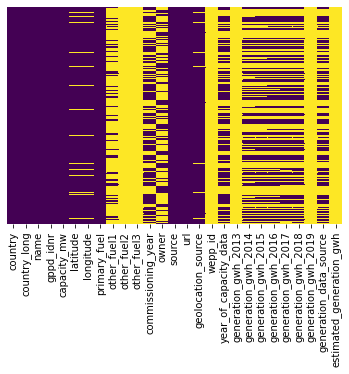

In [9]:
sns.heatmap(dt.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

In [10]:
# Getting information on the dataset
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [11]:
# To find the correlection in the dataset
dt.corr().T

capacity_mw  latitude  longitude  other_fuel3  \
capacity_mw                  1.000000  0.051309   0.197129          NaN   
latitude                     0.051309  1.000000   0.036362          NaN   
longitude                    0.197129  0.036362   1.000000          NaN   
other_fuel3                       NaN       NaN        NaN          NaN   
commissioning_year           0.304087  0.129902   0.121910          NaN   
wepp_id                           NaN       NaN        NaN          NaN   
year_of_capacity_data             NaN       NaN        NaN          NaN   
generation_gwh_2013               NaN       NaN        NaN          NaN   
generation_gwh_2014          0.839094  0.060330   0.013511          NaN   
generation_gwh_2015          0.844352  0.048610   0.022760          NaN   
generation_gwh_2016          0.870620  0.041387   0.050732          NaN   
generation_gwh_2017          0.886673  0.040568   0.048678          NaN   
generation_gwh_2018          0.901918  0.040476   0.045599          NaN   
generation_gwh_2019               NaN       NaN        NaN          NaN   
estimated_generation_gwh          NaN       NaN        NaN          NaN   

                          commissioning_year  wepp_id  year_of_capacity_data  \
capacity_mw                         0.304087      NaN                    NaN   
latitude                            0.129902      NaN                    NaN   
longitude                           0.121910      NaN                    NaN   
other_fuel3                              NaN      NaN                    NaN   
commissioning_year                  1.000000      NaN                    NaN   
wepp_id                                  NaN      NaN                    NaN   
year_of_capacity_data                    NaN      NaN                    NaN   
generation_gwh_2013                      NaN      NaN                    NaN   
generation_gwh_2014                 0.160014      NaN                    NaN   
generation_gwh_2015                 0.170363      NaN                    NaN   
generation_gwh_2016                 0.193743      NaN                    NaN   
generation_gwh_2017                 0.191367      NaN                    NaN   
generation_gwh_2018                 0.193694      NaN                    NaN   
generation_gwh_2019                      NaN      NaN                    NaN   
estimated_generation_gwh                 NaN      NaN                    NaN   

                          generation_gwh_2013  generation_gwh_2014  \
capacity_mw                               NaN             0.839094   
latitude                                  NaN             0.060330   
longitude                                 NaN             0.013511   
other_fuel3                               NaN                  NaN   
commissioning_year                        NaN             0.160014   
wepp_id                                   NaN                  NaN   
year_of_capacity_data                     NaN                  NaN   
generation_gwh_2013                       NaN                  NaN   
generation_gwh_2014                       NaN             1.000000   
generation_gwh_2015                       NaN             0.961098   
generation_gwh_2016                       NaN             0.937060   
generation_gwh_2017                       NaN             0.912561   
generation_gwh_2018                       NaN             0.902781   
generation_gwh_2019                       NaN                  NaN   
estimated_generation_gwh                  NaN                  NaN   

                          generation_gwh_2015  generation_gwh_2016  \
capacity_mw                          0.844352             0.870620   
latitude                             0.048610             0.041387   
longitude                            0.022760             0.050732   
other_fuel3                               NaN                  NaN   
commissioning_year                   0.170363             0.193743   
wep

<AxesSubplot:>

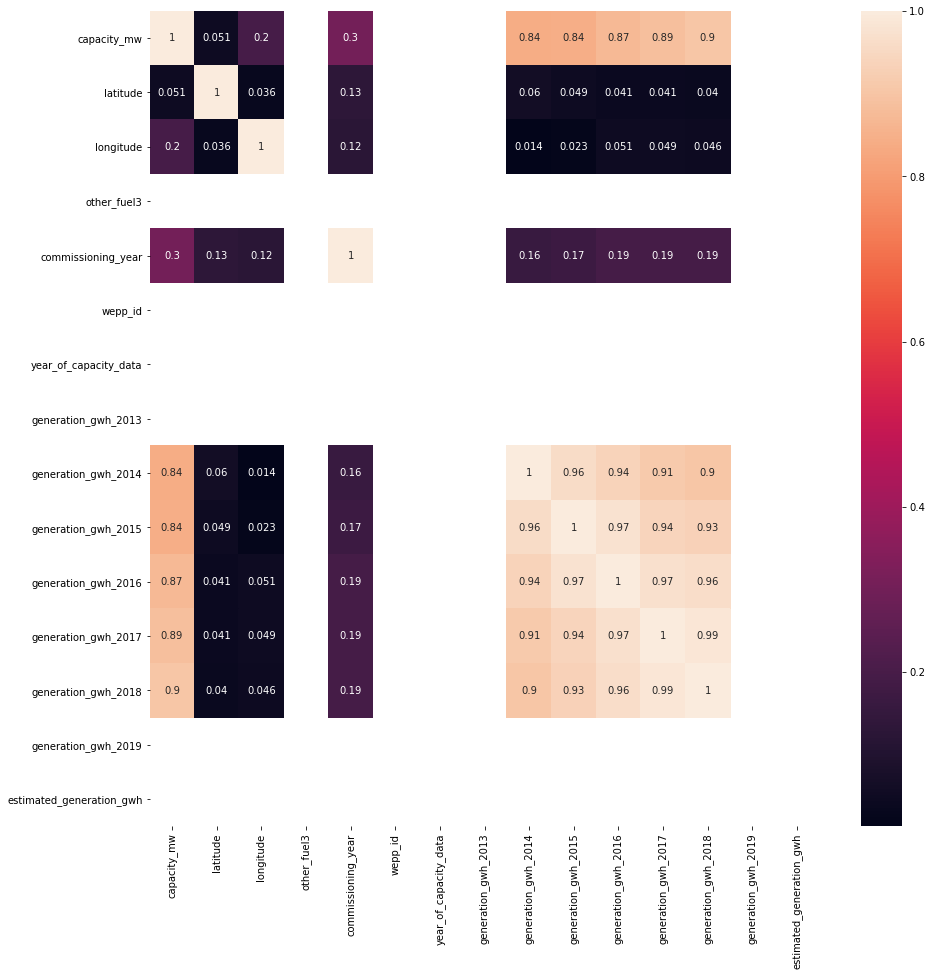

In [12]:
e=dt.corr()
# Ploting the heatmap for better understanding
plt.subplots(figsize=(15,15))
sns.heatmap(e,annot=True)

In [13]:
dt.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

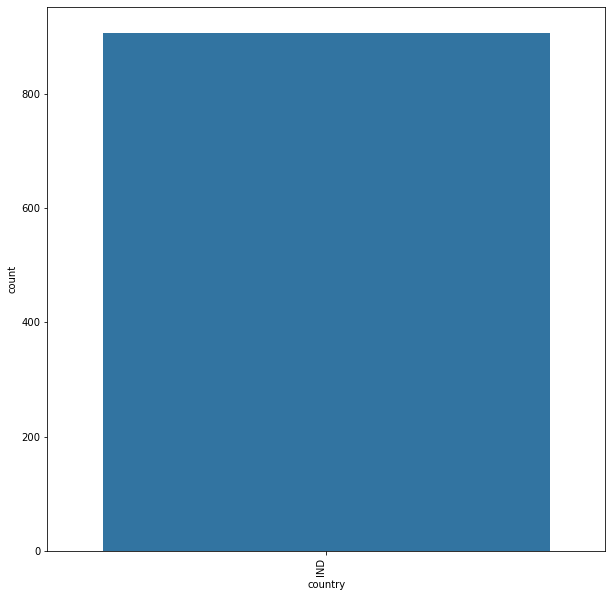

In [15]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['country'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

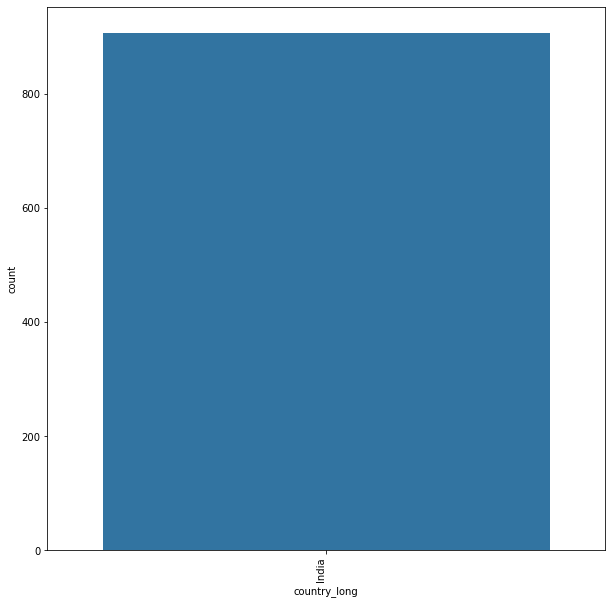

In [16]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['country_long'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

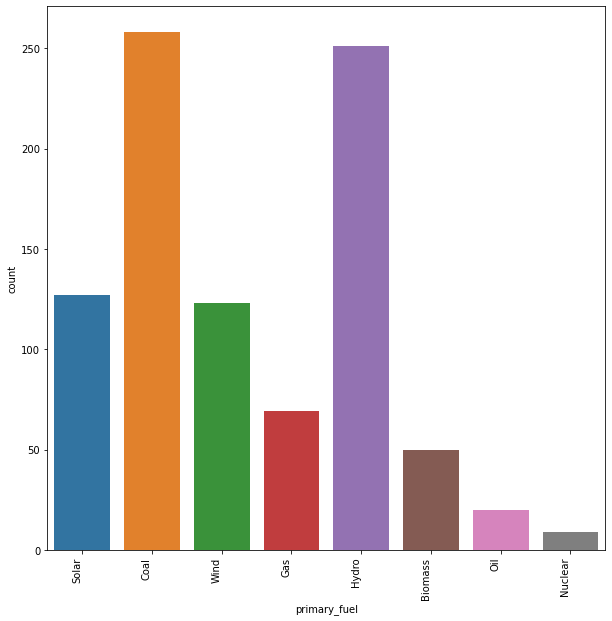

In [17]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['primary_fuel'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

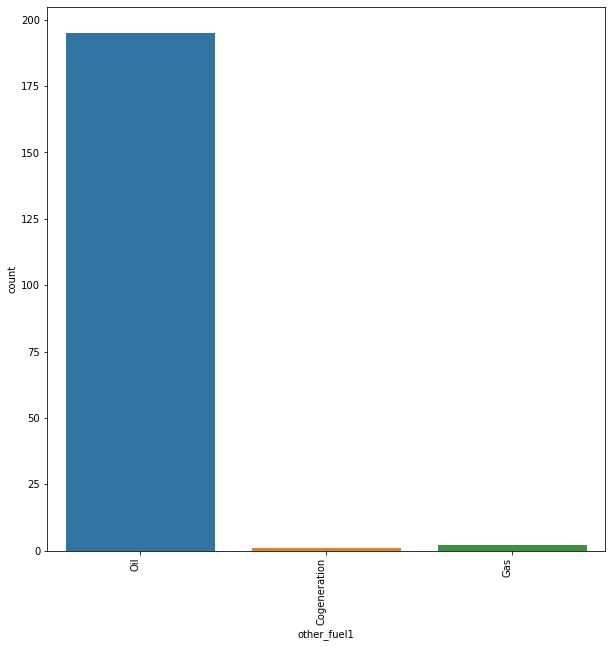

In [18]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['other_fuel1'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

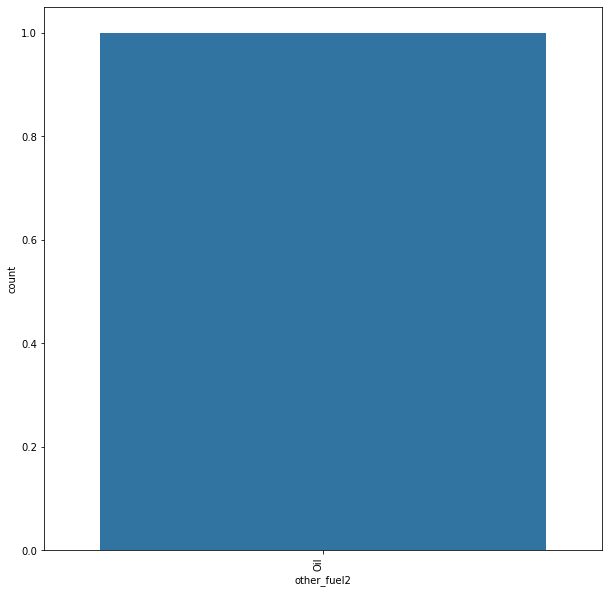

In [19]:
plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['other_fuel2'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

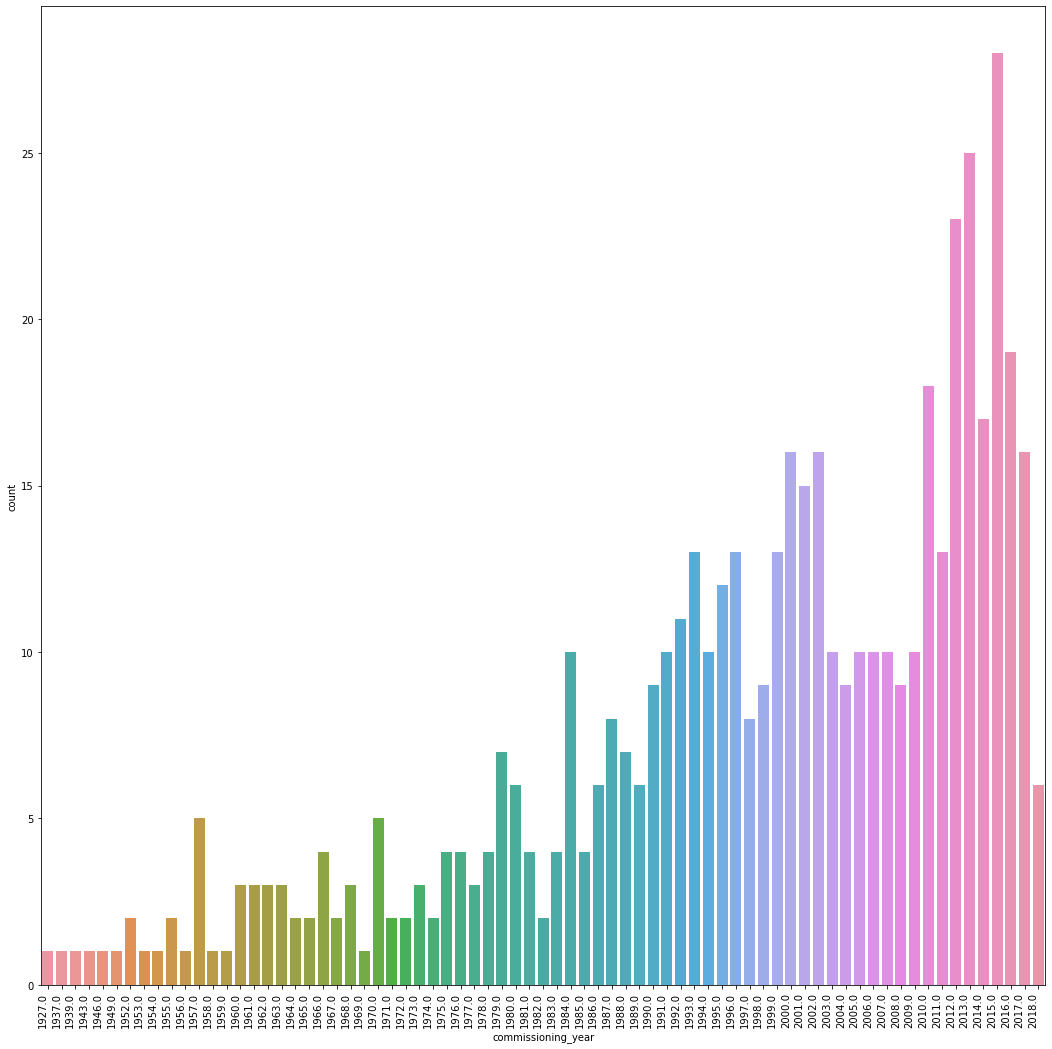

In [20]:
plt.subplots(figsize=(18,18))
chart =sns.countplot(dt['commissioning_year'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()

<AxesSubplot:xlabel='commissioning_year'>

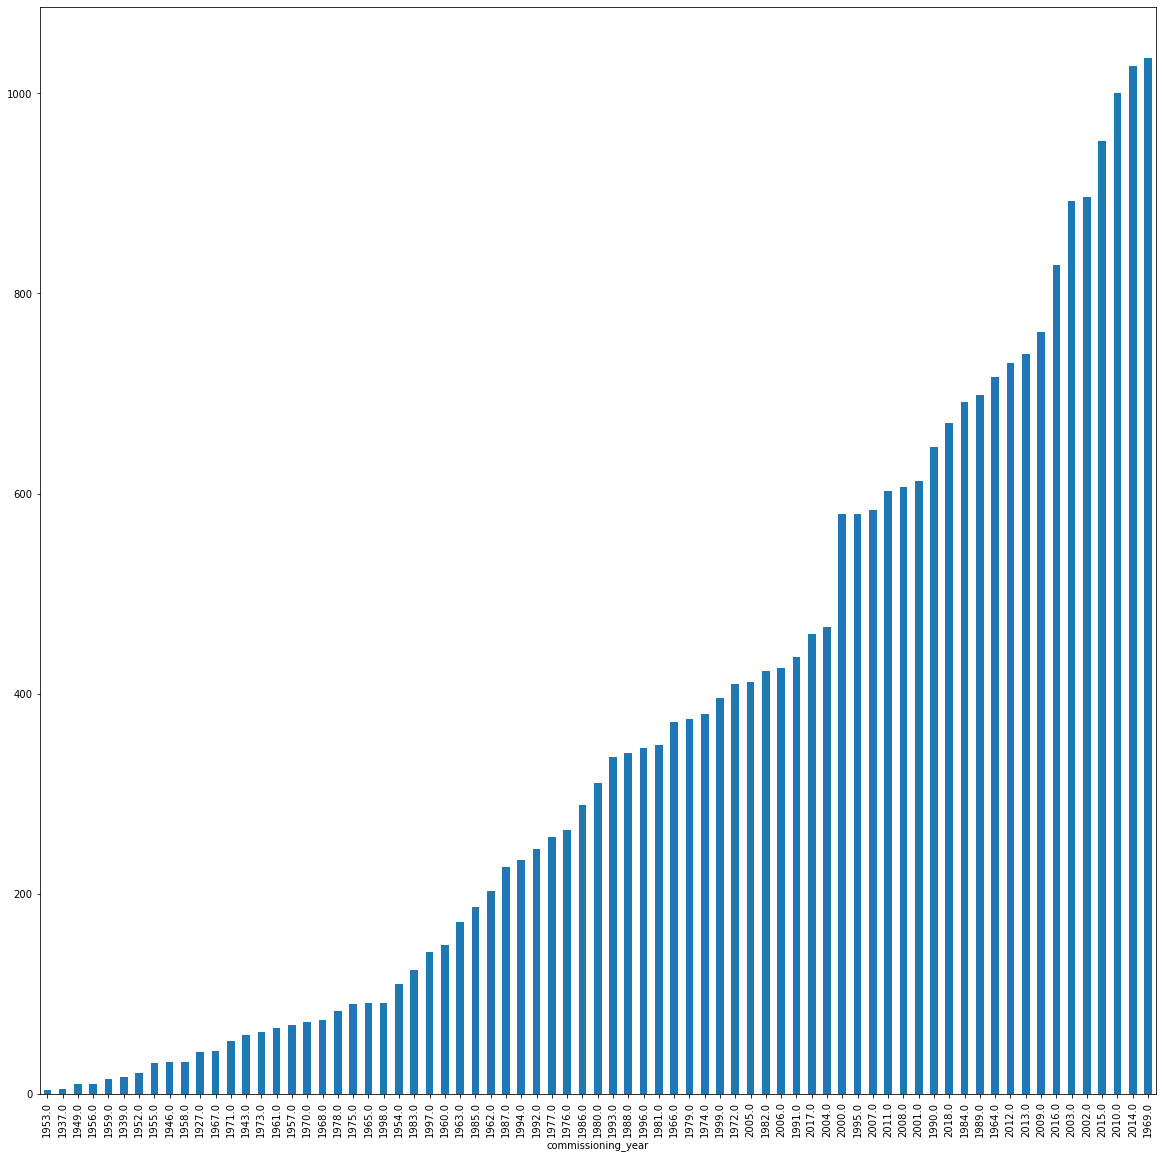

In [36]:
((dt.groupby('commissioning_year')['capacity_mw'].mean()).sort_values()).plot(kind='bar', figsize=(20,20))

In [48]:
((dt.groupby('name')['capacity_mw'].mean()).sort_values()).plot(kind='barh', figsize=(450,400))

<AxesSubplot:ylabel='name'>

<AxesSubplot:ylabel='primary_fuel'>

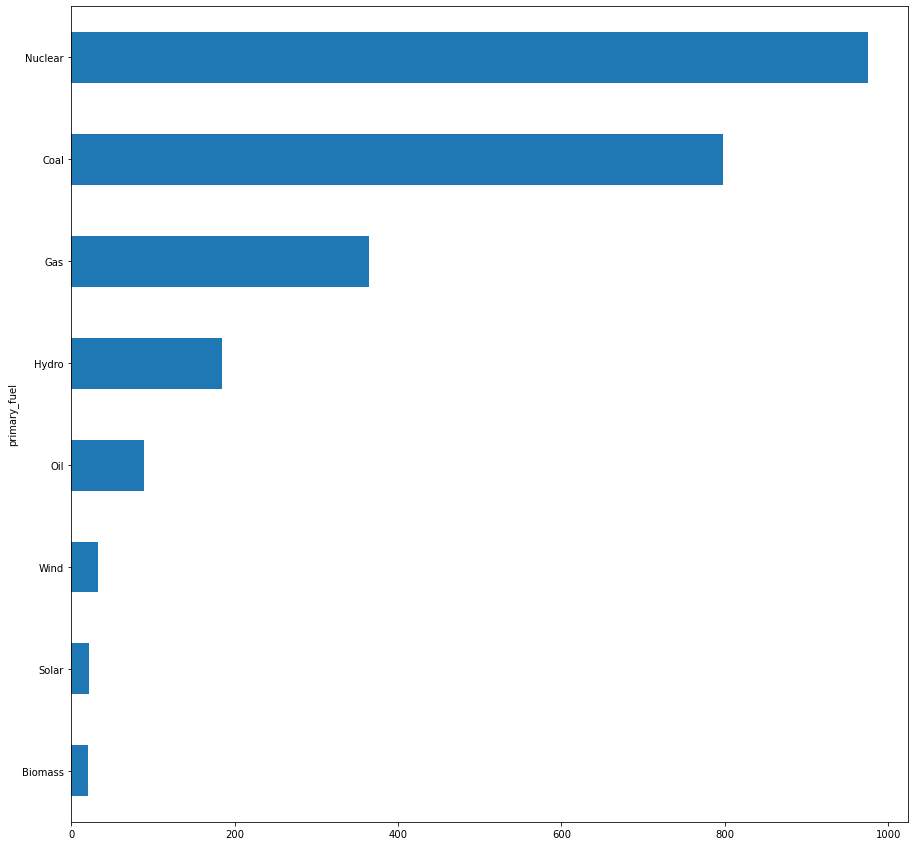

In [11]:
((dt.groupby('primary_fuel')['capacity_mw'].mean()).sort_values()).plot(kind='barh', figsize=(15,15))

<AxesSubplot:ylabel='other_fuel1'>

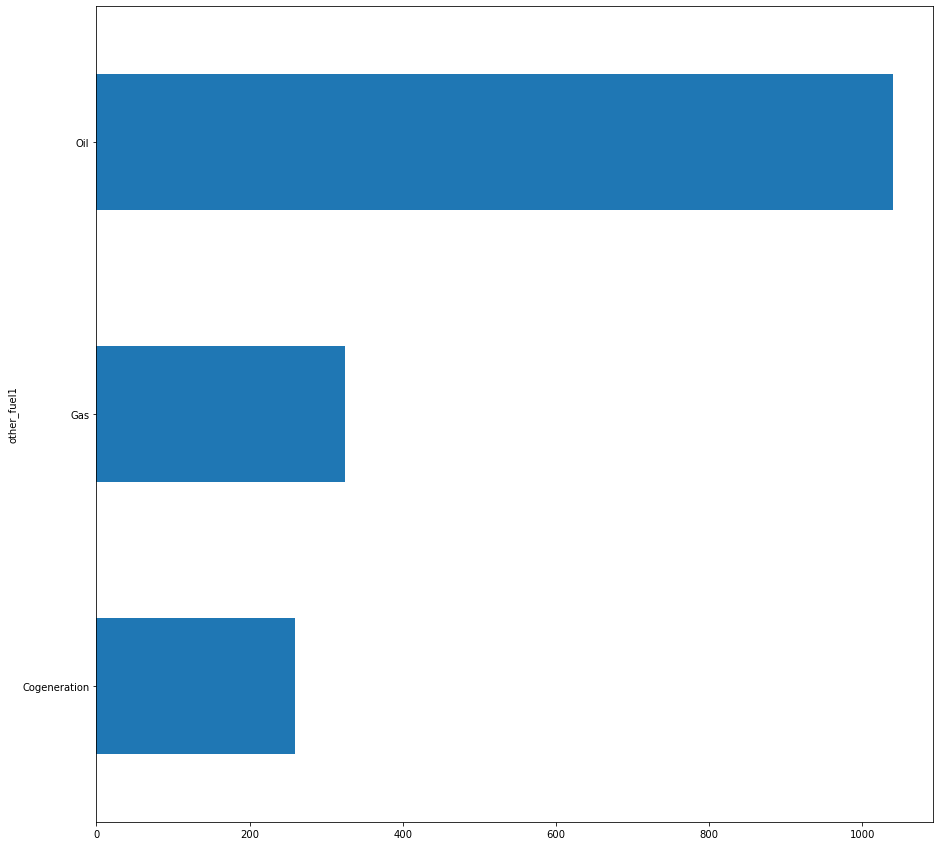

In [12]:
((dt.groupby('other_fuel1')['capacity_mw'].mean()).sort_values()).plot(kind='barh', figsize=(15,15))

In [74]:
dt.drop(columns=['name','gppd_idnr','country','country_long','other_fuel1', 'other_fuel2','other_fuel3','owner','wepp_id','year_of_capacity_data','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','generation_gwh_2019','generation_data_source','estimated_generation_gwh','url','source'],inplace=True)

In [75]:
dt['commissioning_year'].mode()[0]

2015.0

In [76]:
dt['commissioning_year'].fillna(dt['commissioning_year'].mode()[0],inplace=True)

In [77]:
dt.isna().sum()

capacity_mw            0
latitude              46
longitude             46
primary_fuel           0
commissioning_year     0
geolocation_source    19
dtype: int64

In [80]:
dt.dropna(inplace=True)

In [81]:
dt

capacity_mw  latitude  longitude primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407        Solar              2011.0   
1           98.0   24.7663    74.6090         Coal              2015.0   
2           39.2   21.9038    69.3732         Wind              2015.0   
3          135.0   23.8712    91.3602          Gas              2004.0   
4         1800.0   21.9603    82.4091         Coal              2015.0   
..           ...       ...        ...          ...                 ...   
902       1600.0   16.2949    77.3568         Coal              2016.0   
903          3.0   12.8932    78.1654        Solar              2015.0   
904         25.5   15.2758    75.5811         Wind              2015.0   
905         80.0   24.3500    73.7477         Coal              2015.0   
906         16.5    9.9344    77.4768         Wind              2015.0   

                       geolocation_source  
0    National Renewable Energy Laboratory  
1                                     WRI  
2                                     WRI  
3                                     WRI  
4                                     WRI  
..                                    ...  
902                                   WRI  
903                        Industry About  
904                                   WRI  
905                                   WRI  
906                                   WRI  

[861 rows x 6 columns]

In [82]:
dt.isna().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
geolocation_source    0
dtype: int64

In [83]:
# To find the remaining data type of the dataset
for col in dt:
    print ('This column', col ,'has', dt[col].unique(),'unique elements')
    print ('*'*100)

This column capacity_mw has [2.50000e+00 9.80000e+01 3.92000e+01 1.35000e+02 1.80000e+03 2.50000e+02
 6.00000e+01 1.92000e+02 2.90000e+02 2.10000e+02 1.35000e+03 1.34000e+02
 1.20000e+03 1.69500e+01 2.63000e+03 4.19330e+02 6.00000e+02 1.00000e+01
 1.70000e+01 2.40000e+01 6.52000e+02 4.60000e+01 1.00000e+00 1.65000e+01
 5.00000e+01 1.13600e+02 1.98000e+01 1.32000e+01 5.00000e+00 7.05000e+02
 2.80000e+01 4.50000e+02 1.80000e+02 1.05000e+03 5.10000e+02 6.75000e+01
 3.00000e+02 3.35000e+02 1.20000e+01 3.15000e+02 3.00000e+01 2.00000e+01
 4.20000e+01 7.20000e+02 9.00000e+01 1.32000e+03 1.20000e+02 6.60000e+01
 2.70000e+02 2.28000e+01 1.50000e+01 1.80000e+01 1.70000e+03 2.60000e+01
 4.10000e+01 1.37900e+03 3.40000e+01 1.60000e+01 5.00000e+02 8.00000e+01
 7.50000e+01 1.21000e+03 9.90000e+01 6.96000e+01 6.00000e+00 7.50000e+02
 4.00000e+01 1.65000e+02 7.00000e+01 8.15000e+01 1.12000e+01 3.63000e+01
 1.70000e+00 2.48000e+01 5.04000e+01 1.50000e+02 9.87000e+01 3.00000e+00
 4.20000e+00 5.40000e+0

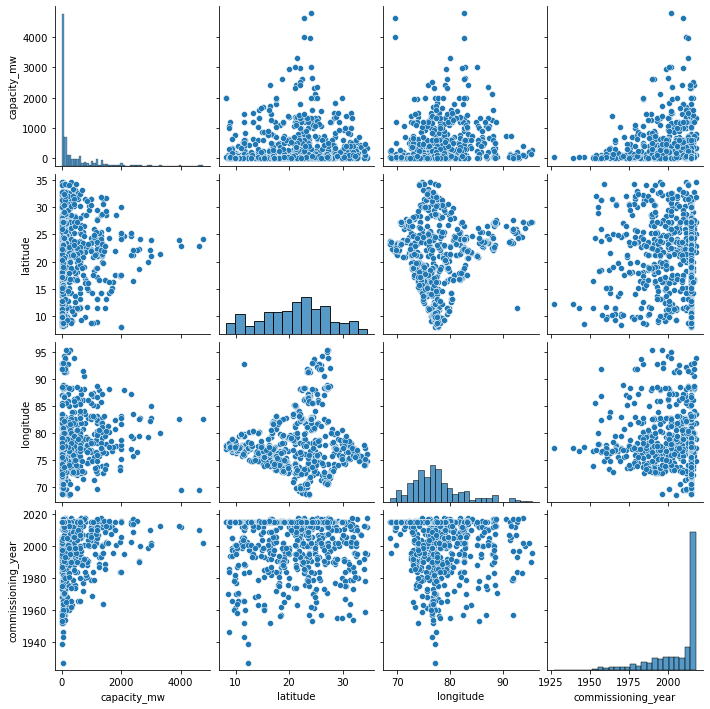

In [84]:
sns.pairplot(dt)

In [85]:
#label encoder
from sklearn.preprocessing import LabelEncoder

In [86]:
# Assigning to a variable
le=LabelEncoder()

In [87]:
# Coverting all the catagorical variables to numerical in trianing dataset
dt['geolocation_source']=le.fit_transform(dt['geolocation_source'])

In [90]:
df=pd.get_dummies(dt, columns=['primary_fuel'], drop_first=True)

In [116]:
df

capacity_mw  latitude  longitude  commissioning_year  geolocation_source  \
0            2.5   28.1839    73.2407              2011.0                   1   
1           98.0   24.7663    74.6090              2015.0                   2   
2           39.2   21.9038    69.3732              2015.0                   2   
3          135.0   23.8712    91.3602              2004.0                   2   
4         1800.0   21.9603    82.4091              2015.0                   2   
..           ...       ...        ...                 ...                 ...   
902       1600.0   16.2949    77.3568              2016.0                   2   
903          3.0   12.8932    78.1654              2015.0                   0   
904         25.5   15.2758    75.5811              2015.0                   2   
905         80.0   24.3500    73.7477              2015.0                   2   
906         16.5    9.9344    77.4768              2015.0                   2   

     primary_fuel_Coal  primary_fuel_Gas  primary_fuel_Hydro  \
0                    0                 0                   0   
1                    1                 0                   0   
2                    0                 0                   0   
3                    0                 1                   0   
4                    1                 0                   0   
..                 ...               ...                 ...   
902                  1                 0                   0   
903                  0                 0                   0   
904                  0                 0                   0   
905                  1                 0                   0   
906                  0                 0                   0   

     primary_fuel_Nuclear  primary_fuel_Oil  primary_fuel_Solar  \
0                       0                 0                   1   
1                       0                 0                   0   
2                       0                 0                   0   
3                       0                 0                   0   
4                       0                 0                   0   
..                    ...               ...                 ...   
902                     0                 0                   0   
903                     0                 0                   1   
904                     0                 0                   0   
905                     0                 0                   0   
906                     0                 0                   0   

     primary_fuel_Wind  
0                    0  
1                    0  
2                    1  
3                    0  
4                    0  
..                 ...  
902                  0  
903                  0  
904                  1  
905                  0  
906                  1  

[861 rows x 12 columns]

In [91]:
# Assignment of X and y
X=df.drop(['capacity_mw'], axis=1)
y=df.capacity_mw

In [92]:
# Standardization of the data
scalar= StandardScaler()
X_scaled=scalar.fit_transform(X)

In [102]:
# Applying machine learning models
# Importing machine learning libraries
# The problem is related regression the regression models are used
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error,mean_absolute_error, r2_score

In [94]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :-1.2528149908615815
At random state, 1, the testing accuracy is :0.2678489711583494


At random state, 2, the training accuracy is :-1.3809904673261988
At random state, 2, the testing accuracy is :0.3228797240307155


At random state, 3, the training accuracy is :-1.1377561720605192
At random state, 3, the testing accuracy is :0.24619314348012578


At random state, 4, the training accuracy is :-0.9860923847607421
At random state, 4, the testing accuracy is :0.16941341939082288


At random state, 5, the training accuracy is :-1.1963355345162756
At random state, 5, the testing accuracy is :0.2568261621897999


At random state, 6, the training accuracy is :-1.3413547750642358
At random state, 6, the testing accuracy is :0.2885031661727614


At random state, 7, the training accuracy is :-1.122805852031945
At random state, 7, the testing accuracy is :0.22173273943484995


At random state, 8, the training accuracy is :-1.1588828625048304
At rando

In [95]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    re=RandomForestRegressor()
    re.fit(x_train, y_train)
    predtrain=re.predict(x_train)
    predtest=re.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :0.9078929370867429
At random state, 1, the testing accuracy is :0.39611627487264267


At random state, 2, the training accuracy is :0.9010053828371234
At random state, 2, the testing accuracy is :0.46262124581151054


At random state, 3, the training accuracy is :0.8754009261808899
At random state, 3, the testing accuracy is :0.5209050027473592


At random state, 4, the training accuracy is :0.8962290437101503
At random state, 4, the testing accuracy is :0.4934119733083754


At random state, 5, the training accuracy is :0.8690090272941742
At random state, 5, the testing accuracy is :0.6244184826829167


At random state, 6, the training accuracy is :0.8871868999294266
At random state, 6, the testing accuracy is :0.4682695576002597


At random state, 7, the training accuracy is :0.8907461499037571
At random state, 7, the testing accuracy is :0.4554118892584519


At random state, 8, the training accuracy is :0.883755430167244
At random state, 

In [97]:
for i in range(1,800):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    de=DecisionTreeRegressor()
    de.fit(x_train, y_train)
    predtrain=de.predict(x_train)
    predtest=de.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9999984497753631
At random state, 1, the testing accuracy is :-0.16406453017256606


At random state 2, the training accuracy is :0.9999984989156763
At random state, 2, the testing accuracy is :0.06466744401351254


At random state 3, the training accuracy is :0.9999975391940998
At random state, 3, the testing accuracy is :0.31742708791589325


At random state 4, the training accuracy is :0.9999976472187693
At random state, 4, the testing accuracy is :0.1341477301961297


At random state 5, the training accuracy is :0.9999999922810955
At random state, 5, the testing accuracy is :0.21654489488163642


At random state 6, the training accuracy is :0.999997536744995
At random state, 6, the testing accuracy is :0.20930985874506725


At random state 7, the training accuracy is :1.0
At random state, 7, the testing accuracy is :0.17207234907500368


At random state 8, the training accuracy is :0.999997624813257
At random state, 8, the testing accu

In [98]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.998248674532135
At random state, 1, the testing accuracy is :0.31440546173789696


At random state 2, the training accuracy is :0.9980282796943142
At random state, 2, the testing accuracy is :0.4087770647157618


At random state 3, the training accuracy is :0.996469009517244
At random state, 3, the testing accuracy is :0.569237247284391


At random state 4, the training accuracy is :0.9972069506315427
At random state, 4, the testing accuracy is :0.4607843555664207


At random state 5, the training accuracy is :0.9969410889981092
At random state, 5, the testing accuracy is :0.6674075557014041


At random state 6, the training accuracy is :0.9968325658215387
At random state, 6, the testing accuracy is :0.4431476257876218


At random state 7, the training accuracy is :0.9957985705204331
At random state, 7, the testing accuracy is :0.31160464724884485


At random state 8, the training accuracy is :0.9976393293593393
At random state, 8, the tes

In [99]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    predtrain=ad.predict(x_train)
    predtest=ad.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :-0.7712048451895652
At random state, 1, the testing accuracy is :-0.04843280263577654


At random state, 2, the training accuracy is :0.02057010024743411
At random state, 2, the testing accuracy is :0.28737709186845617


At random state, 3, the training accuracy is :-0.4903714890315858
At random state, 3, the testing accuracy is :0.22758184304120432


At random state, 4, the training accuracy is :0.13521343985874168
At random state, 4, the testing accuracy is :0.27270356483897296


At random state, 5, the training accuracy is :0.02939200389682084
At random state, 5, the testing accuracy is :0.38946157369139034


At random state, 6, the training accuracy is :-1.249650300101008
At random state, 6, the testing accuracy is :0.20013740201484032


At random state, 7, the training accuracy is :-0.24581601884625193
At random state, 7, the testing accuracy is :0.15144755484802896


At random state, 8, the training accuracy is :-0.6058878409431301
At

In [100]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.3100897386750452
At random state, 1, the testing accuracy is :0.18731711215484803


At random state 2, the training accuracy is :0.164960179543986
At random state, 2, the testing accuracy is :0.40864914567514365


At random state 3, the training accuracy is :0.11612777153363285
At random state, 3, the testing accuracy is :0.40093177906832644


At random state 4, the training accuracy is :0.1757361820293465
At random state, 4, the testing accuracy is :0.26791745010888846


At random state 5, the training accuracy is :-0.08319864325719739
At random state, 5, the testing accuracy is :0.48744198146725415


At random state 6, the training accuracy is :0.24989958914661026
At random state, 6, the testing accuracy is :0.28015856471419565


At random state 7, the training accuracy is :0.14047265661123498
At random state, 7, the testing accuracy is :0.3896313239531287


At random state 8, the training accuracy is :0.14226069380843742
At random state

In [103]:
for i in range(1,200):
    x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=i)
    sr=SVR()
    sr.fit(x_train, y_train)
    predtrain=sr.predict(x_train)
    predtest=sr.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :-386.2014086930661
At random state, 1, the testing accuracy is :-0.15057730377481438


At random state 2, the training accuracy is :-348.3240168924506
At random state, 2, the testing accuracy is :-0.13646780811521064


At random state 3, the training accuracy is :-386.8399808158195
At random state, 3, the testing accuracy is :-0.14640407547468426


At random state 4, the training accuracy is :-337.14787847700325
At random state, 4, the testing accuracy is :-0.0747972333601643


At random state 5, the training accuracy is :-402.42038355596213
At random state, 5, the testing accuracy is :-0.1414456232517709


At random state 6, the training accuracy is :-409.9760602825369
At random state, 6, the testing accuracy is :-0.1974362980263895


At random state 7, the training accuracy is :-358.3586485628269
At random state, 7, the testing accuracy is :-0.12147988200217319


At random state 8, the training accuracy is :-383.26886208420774
At random st

In [104]:
# Importing PCA components
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(X_scaled)

array([[ 2.7793156 ,  1.05717085,  0.2864045 , ...,  0.20359803,
         0.31018343,  0.98647597],
       [ 0.02247746, -1.12969114,  1.23231298, ..., -0.24065285,
        -0.1159744 , -0.00402748],
       [ 0.69980851, -1.60870084, -2.21887781, ...,  0.42604187,
        -0.06892881, -0.00558861],
       ...,
       [ 0.2154323 , -1.82453393, -2.05947503, ...,  0.40598558,
        -0.07966065,  0.00278491],
       [ 0.0658566 , -1.15676378,  1.13548765, ..., -0.27206909,
        -0.12615211, -0.00419895],
       [ 0.00835538, -2.03203556, -2.1963247 , ...,  0.31493464,
        -0.11190973,  0.00780115]])

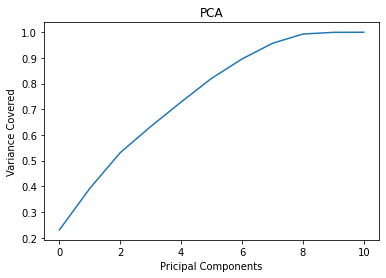

In [105]:
# Ploting Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Pricipal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [ ]:
pca=PCA(n_components=7)
new_pcomp=pca.fit_transform(X_scaled)
prin_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7'])

In [ ]:
prin_comp

In [111]:
for i in range(1,2000):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    li=LinearRegression()
    li.fit(x_train, y_train)
    predtrain=li.predict(x_train)
    predtest=li.predict(x_test)
    print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state, 1, the training accuracy is :-1.460822432128945
At random state, 1, the testing accuracy is :0.2541528893222643


At random state, 2, the training accuracy is :-1.5703701551906986
At random state, 2, the testing accuracy is :0.2947790556479306


At random state, 3, the training accuracy is :-1.3336754069417065
At random state, 3, the testing accuracy is :0.23153214369533803


At random state, 4, the training accuracy is :-1.1581361713629934
At random state, 4, the testing accuracy is :0.1549789187373788


At random state, 5, the training accuracy is :-1.3934495280559438
At random state, 5, the testing accuracy is :0.24318647168670615


At random state, 6, the training accuracy is :-1.5719139416567698
At random state, 6, the testing accuracy is :0.2782332235902799


At random state, 7, the training accuracy is :-1.3189328374814067
At random state, 7, the testing accuracy is :0.21061931930263322


At random state, 8, the training accuracy is :-1.3630608094232093
At rando

In [112]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 312.3998390883749
The MSE is 312.3998390883749 and RMSE is 17.674836324231546


In [109]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    kn=KNeighborsRegressor()
    kn.fit(x_train, y_train)
    predtrain=kn.predict(x_train)
    predtest=kn.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.2435856037099321
At random state, 1, the testing accuracy is :0.17522710019337107


At random state 2, the training accuracy is :0.11114737094673899
At random state, 2, the testing accuracy is :0.4053899653933587


At random state 3, the training accuracy is :0.09043920675430517
At random state, 3, the testing accuracy is :0.3714628471803816


At random state 4, the training accuracy is :0.1349089238229968
At random state, 4, the testing accuracy is :0.22919917534196022


At random state 5, the training accuracy is :-0.14466765770472123
At random state, 5, the testing accuracy is :0.48293686352668863


At random state 6, the training accuracy is :0.18764923113327003
At random state, 6, the testing accuracy is :0.22993985390051186


At random state 7, the training accuracy is :0.15366098742175083
At random state, 7, the testing accuracy is :0.3388196746391169


At random state 8, the training accuracy is :0.07499044234175012
At random state

In [110]:
# Calculating the MSE, RMSE and MAE for K-NN model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 325.29590057803466
The MSE is 325.29590057803466 and RMSE is 18.03596131560596


In [114]:
for i in range(1,400):
    x_train,x_test,y_train, y_test=train_test_split(prin_comp,y,test_size=.20, random_state=i)
    xg=XGBRegressor()
    xg.fit(x_train, y_train)
    predtrain=xg.predict(x_train)
    predtest=xg.predict(x_test)
    print(f"At random state {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
    print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")
    print("\n")

At random state 1, the training accuracy is :0.9990472448162286
At random state, 1, the testing accuracy is :-0.047361415269707496


At random state 2, the training accuracy is :0.9987732297323922
At random state, 2, the testing accuracy is :0.19684226617886158


At random state 3, the training accuracy is :0.9995191776648104
At random state, 3, the testing accuracy is :0.15215929298745312


At random state 4, the training accuracy is :0.9992353257738488
At random state, 4, the testing accuracy is :0.144234256200498


At random state 5, the training accuracy is :0.9991081244463523
At random state, 5, the testing accuracy is :0.38988274892138564


At random state 6, the training accuracy is :0.9994082850936249
At random state, 6, the testing accuracy is :0.22375421295880882


At random state 7, the training accuracy is :0.9988419150839642
At random state, 7, the testing accuracy is :0.35465963486854535


At random state 8, the training accuracy is :0.9994167062780973
At random state, 8,

In [115]:
# Calculating the MSE, RMSE and MAE for XGBoost Model
mse=mean_absolute_error(y_test, predtest)
rmse=np.sqrt(mse)
print('The MAE is', mean_absolute_error(y_test, predtest))
print ('The MSE is', mse, 'and RMSE is', rmse)

The MAE is 345.24240920097145
The MSE is 345.24240920097145 and RMSE is 18.580699911493415


In [121]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=259)
re=RandomForestRegressor()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)
print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state, 399, the training accuracy is :0.8819134488796478
At random state, 399, the testing accuracy is :0.6632841578515731


In [124]:
#Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parameters={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [2, 4, 6, 8, 10, 12]}

In [125]:
c=GridSearchCV(RandomForestRegressor(),param_grid=parameters)
c.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [2, 4, 6, 8, 10, 12]})

In [126]:
c.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 12}

In [142]:
x_train,x_test,y_train, y_test=train_test_split(X_scaled,y,test_size=.20, random_state=259)
re=RandomForestRegressor(bootstrap= True, max_features='sqrt', min_samples_leaf=2, min_samples_split=10,n_estimators=15)
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)
print(f"At random state, {i}, the training accuracy is :{r2_score(predtrain,y_train)}")
print(f"At random state, {i}, the testing accuracy is :{r2_score(y_test, predtest)}")

At random state, 399, the training accuracy is :0.8790809285956755
At random state, 399, the testing accuracy is :0.6812663248610271


In [ ]:
# Picking the file
import pickle
filename = 'gpp'
outfile = open(filename,'wb')
pickle.dump(gpp_dict,outfile)
outfile.close()

# Conclusion
The data set of global power plant was analyzed it can be seen that primary source of power was nuclear, coal and oil. Label encoding and get dummies were applied to get the model. Different model were tried, it was found that random forest was most suitable and hyperparameter tuning were performed. The accuracy achieved is 68.12663248610271% by using Random forest.